In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import itertools
import math

import scienceplots


from scipy import stats
from scipy.optimize import curve_fit, fmin_slsqp
from sklearn.metrics import accuracy_score, roc_auc_score, f1_score, recall_score, precision_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.decomposition import PCA
from matplotlib.patches import Patch
from scipy.optimize import leastsq

from Analysis.Auxiliary import *
from Figures.Kinetics import *
import Figures.Auxiliary as aux

plt.style.use(['science', 'no-latex', 'nature'])
plt.rcParams['svg.fonttype'] = 'none'

%matplotlib inline

In [2]:
# DEFINE STATIC VARIABLES

PATH_EXAMPLE = r"../data/Example_data/Thresholding"

# frame to treat as final frame (in case more data was recorded but should be ignored)
FINAL_FRAME = 13 # 2h

# fluorescence delta threshold to treat a partition as positive
THRESHOLD_POSITIVE = 3000



       index  Unnamed: 0    UID            y            x  time  \
607      607        7903    608   280.689189   565.621622   120   
612      612        7968    613   280.756757  1431.986486   120   
615      615        8007    616   281.253968   260.666667   120   
617      617        8033    618   281.171429   541.242857   120   
618      618        8046    619   281.689189   821.621622   120   
...      ...         ...    ...          ...          ...   ...   
50113  16335      212367  50114  1786.916667   904.479167   120   
50114  16336      212380  50115  1787.300000   928.880000   120   
50115  16337      212393  50116  1786.979167   953.104167   120   
50116  16338      212406  50117  1787.229167   977.541667   120   
50117  16339      212419  50118  1787.240000  1002.080000   120   

       feat_fq_initial  feat_rox_initial  feat_fq_delta_final  \
607        8993.879489       3770.824324          -100.399375   
612        8510.031755       3938.675676          -105.753371   


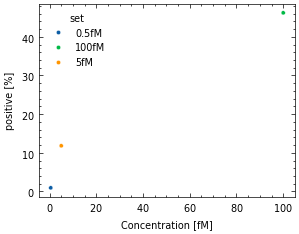

In [3]:
meas = pd.DataFrame({'set':[], 'positive [%]':[], 'Concentration [fM]':[]})

df = batch_load_and_combine(os.path.join(PATH_EXAMPLE), 'features_{}.csv'.format(FINAL_FRAME))
df = clean(df, z_roxInitial_exclude=2.5, z_fqInitial_exclude=2.5, frac_edge_exclude=0.05, dropna=False)

print(df)

for set in df['set'].unique():

    positive = 100*len(df.loc[(df['set'] == set) & (df['feat_fq_delta_max'] > THRESHOLD_POSITIVE)]) / len(df.loc[(df['set'] == set)])       
    meas.loc[len(meas.index)] = [set, positive, float(set[set.find("_")+1:set.find("fM")])]
    
sns.scatterplot(data=meas, x='Concentration [fM]', y='positive [%]', hue='set')
plt.show()